## Trained Model / Encode Data

In [1]:
## Importing all Libraries
import cv2
import face_recognition
import numpy as np
import os
import pandas as pd

# Load All Images
path = 'images'
images = []
personName = []
myList = os.listdir(path)
#print(myList)

# Get Id of All Names
for cu_img in myList:
    current_img = cv2.imread(f'{path}/{cu_img}')
    images.append(current_img)
    personName.append(os.path.splitext(cu_img)[0])
#print(personName)

# Encode All Faces
def faceEncodings(images):
    encodeList = []
    for img in images:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        encode = face_recognition.face_encodings(img)[0]
        encodeList.append(encode)
    return encodeList

# Get Data From Database
data = pd.read_csv('ET Group 2.csv')

encodelistKnow = faceEncodings(images)
print('All Encodings Successful !!!')

All Encodings Successful !!!


## Live Video Face Detection

In [2]:
Data = []
All_Persons = []

cap = cv2.VideoCapture(0)
#cap = cv2.VideoCapture('http://100.91.150.87:8080/video')   # Phone
#cap = cv2.VideoCapture('http://192.168.1.10:8080/video')    # Hostel

while True:
    ret, frame = cap.read()
    faces = cv2.resize(frame,(400,400), None, 0.25, 0.25)
    faces = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    facesCurrentFrame = face_recognition.face_locations(faces)
    encodeCurrentFrame = face_recognition.face_encodings(faces, facesCurrentFrame)
    
    for encodeFace, faceLoc in zip(encodeCurrentFrame, facesCurrentFrame):
        matches = face_recognition.compare_faces(encodelistKnow, encodeFace)
        faceDis = face_recognition.face_distance(encodelistKnow, encodeFace)        
        matchIndex = np.argmin(faceDis)
        if matches[matchIndex]:
            roll_no = personName[matchIndex]
            Data.append(roll_no)
            #print(Data)
            for ID in Data:
                if ID not in All_Persons:
                    All_Persons.append(ID)

            y1,x2,y2,x1 = faceLoc
            y1,x2,y2,x1 = y1*4,x2*4,y2*4,x1*4
            cv2.rectangle(frame, (y1,x2,y2,x1), (0,255,0), 2)
            cv2.rectangle(frame, (x1, y2-35), (x2,y2),(0,255,0), cv2.FILLED)
            cv2.putText(frame, roll_no, (x1 + 6, y2 + 6), cv2.FONT_HERSHEY_COMPLEX, 1, (0,0,255), 2)
            
    cv2.imshow('Camera',frame)
    if (cv2.waitKey(1) & 0xFF == ord('q')):
        break
                               
cap.release()
cv2.destroyAllWindows()    

for person in All_Persons:
    print(person)
    for detail in data.index:
        if str(data['Mobile Number'][detail]) == person:
            print('____________________________________________ \n')
            print(data.loc[detail])
            print('____________________________________________ \n')

9027800200
____________________________________________ 

Roll Number                            13
 NAME                        Nikhil Kumar
Department                            MCA
Year                                  1st
Email Address    yadavnikhilrao@gmail.com
Mobile Number                  9027800200
Gender                               Male
Name: 12, dtype: object
____________________________________________ 



## Photo Face Detection

In [3]:
# Uploaded Image Path /  Test Image
image_path = 'test_images/'+input('Photo Name: ')+".jpg"
imagetest = face_recognition.load_image_file(image_path)
imagetest = cv2.cvtColor(imagetest,cv2.COLOR_BGR2RGB)

# Run
while True:
    
    faces = cv2.resize(imagetest,(0,0), None, 0.25, 0.25)
    faces = cv2.cvtColor(imagetest, cv2.COLOR_BGR2RGB)
    facesCurrentFrame = face_recognition.face_locations(faces)
    encodeCurrentFrame = face_recognition.face_encodings(faces, facesCurrentFrame)
    
    for encodeFace, faceLoc in zip(encodeCurrentFrame, facesCurrentFrame):
        matches = face_recognition.compare_faces(encodelistKnow, encodeFace)
        faceDis = face_recognition.face_distance(encodelistKnow, encodeFace)        
        matchIndex = np.argmin(faceDis)
        if matches[matchIndex]:
            roll_no = personName[matchIndex]
            #print(roll_no) 
            
            y1,x2,y2,x1 = faceLoc

            y1,x2,y2,x1 = y1*4,x2*4,y2*4,x1*4
            cv2.rectangle(imagetest, (y1,x2,y2,x1), (0,255,0), 2)
            cv2.rectangle(imagetest, (x1, y2-35), (x2,y2),(0,255,0), cv2.FILLED)
            cv2.putText(imagetest, roll_no, (x1 + 6, y2 + 6), cv2.FONT_HERSHEY_COMPLEX, 1, (0,0,255), 2)
            
            #cv2.imshow('Person', imagetest)
            cv2.waitKey(0)==ord('q')
            cv2.destroyAllWindows
    break
    
for detail in data.index:
    if str(data['Mobile Number'][detail]) == roll_no:
        print('____________________________________________ \n')
        print(data.loc[detail])
        print('____________________________________________ \n')


Photo Name: unknown4
____________________________________________ 

Roll Number                       1
 NAME                   Aman Dhiman
Department                      MCA
Year                            1st
Email Address    ad975645@gmail.com
Mobile Number            9536665735
Gender                         Male
Name: 0, dtype: object
____________________________________________ 



## Recorded Video Face Detection

In [ ]:
Data = []
All_Persons = []

video_path = 'test_videos/'+input('Video Name: ')+".mp4"
cap = cv2.VideoCapture(video_path)

while True:
    ret,frame = cap.read()
    
    faces = cv2.resize(frame,(400,400), None, 0.25, 0.25)
    faces = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    facesCurrentFrame = face_recognition.face_locations(faces)
    encodeCurrentFrame = face_recognition.face_encodings(faces, facesCurrentFrame)
    
    for encodeFace, faceLoc in zip(encodeCurrentFrame, facesCurrentFrame):
        matches = face_recognition.compare_faces(encodelistKnow, encodeFace)
        faceDis = face_recognition.face_distance(encodelistKnow, encodeFace)        
        matchIndex = np.argmin(faceDis)
        if matches[matchIndex]:
            roll_no = personName[matchIndex]
            Data.append(roll_no)
            #print(Data)
            for ID in Data:
                if ID not in All_Persons:
                    All_Persons.append(ID)

            y1,x2,y2,x1 = faceLoc
            y1,x2,y2,x1 = y1*4,x2*4,y2*4,x1*4
            cv2.rectangle(frame, (y1,x2,y2,x1), (0,255,0), 2)
            cv2.rectangle(frame, (x1, y2-35), (x2,y2),(0,255,0), cv2.FILLED)
            cv2.putText(frame, roll_no, (x1 + 6, y2 + 6), cv2.FONT_HERSHEY_COMPLEX, 1, (0,0,255), 2)
            cv2.imshow('Camera',frame)
    
    cv2.imshow("Video",frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

for person in All_Persons:
    print(person)
    for detail in data.index:
        if str(data['Mobile Number'][detail]) == person:
            print('____________________________________________ \n')
            print(data.loc[detail])
            print('____________________________________________ \n')

Male      15
Female     9
Name: Gender, dtype: int64


<AxesSubplot:ylabel='Gender'>

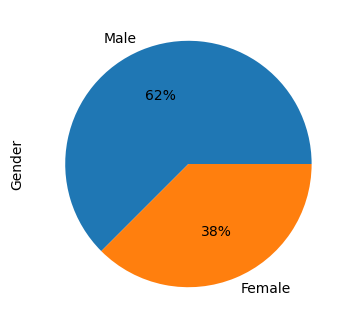

In [5]:
# Data Visulisation
from matplotlib import pyplot as plt
print(data['Gender'].value_counts())
data['Gender'].value_counts().plot(kind='pie', figsize = (4,4),autopct='%2.0f%%')

In [7]:
# df = pd.read_csv('ET Group 2.csv')